In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
from matplotlib import pyplot as plt
import sys 
sys.path.append('../../modules/')
import matplotlib_config as mconf
colorI, colorII, colorIII = mconf.set_standard_layout()


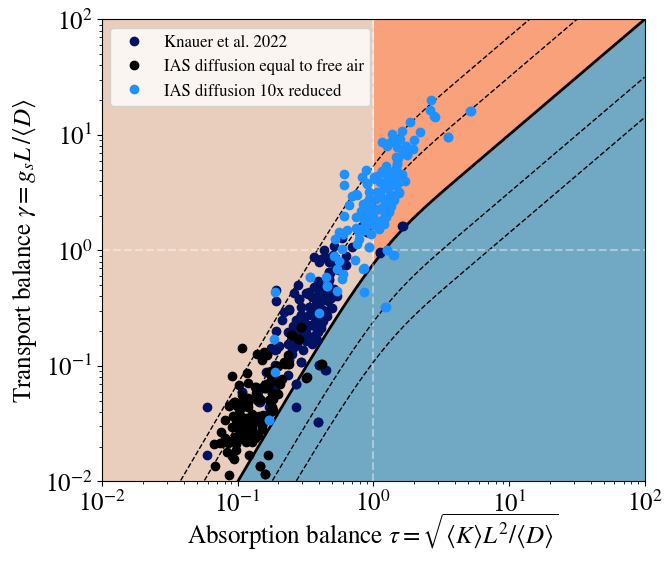

In [3]:
# load data for amphistomatous correction visualization
df = pd.read_csv('../../data/saved_data/Knauer2022_hypostomatous.csv', sep=';', decimal=',')

fig, ax = plt.subplots(figsize=(7, 6))
chi_ = 0.1
xmin, xmax = 0.01, 100
taus = np.exp(np.linspace(np.log(xmin), np.log(xmax), 400))
borders = lambda taus, sigma: sigma*taus*np.tanh(taus)

# shading
ax.fill_between(taus, borders(taus, 1), xmin, color=colorI)
ax.fill_between(taus[taus <= 1], xmax, borders(taus[taus <= 1], 1), color=colorII)
ax.fill_between(taus[taus >= 1], xmax, borders(taus[taus >= 1], 1), color=colorIII)
# lines
ax.plot(taus, borders(taus, 1), color='black', linestyle='-', linewidth=2)
ax.plot(taus, borders(taus, np.sqrt(50)), color='black', linestyle='--', linewidth=1)
ax.plot(taus, borders(taus, np.sqrt(10)), color='black', linestyle='--', linewidth=1)
ax.plot(taus, borders(taus, 1/np.sqrt(10)), color='black', linestyle='--', linewidth=1)
ax.plot(taus, borders(taus, 1/np.sqrt(50)), color='black', linestyle='--', linewidth=1)
#
ax.set_xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 / \langle D \rangle}$', fontsize=18)
ax.set_ylabel(r'Transport balance $\gamma = g_s L \;/ \langle D \rangle$', fontsize=18)
ax.plot([1, 1], [xmin, xmax], color='white', linestyle='--', alpha=0.4)
ax.plot([xmin, xmax], [1, 1],  color='white', linestyle='--', alpha=0.4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)

# plot original data points
tau0 = df['tau'].values
gamma0 = df['gamma'].values
ax.plot(tau0, gamma0, 'o', markersize=6, color=mconf.hex2rgb('001261'), label='Knauer et al. 2022')

def scale(taus, gammas, factors):
    ''' 
    Function that scales the taus and gammas by a factor assuming that the geometry factor (porosity/tortuosity) is modified by the same factor.
    taus: np.ndarray of taus
    gammas: np.ndarray of gammas
    factors: np.ndarray of factors to scale the taus and gammas by
    Returns: scaled taus and gammas
    '''
    return taus / np.sqrt(factors), gammas / factors

# plot the case where there is no reduction from regular air diffusion at all
factors = np.zeros_like(tau0)
for i in df.index.tolist():
    # cancel the geometry factor applied to the diffusivity in air (datareader_Knauer2022.ipynb)
    factors[i] = 1.57 / df.loc[i, 'fias_mesophyll'] # tortuosity adopted uniformly from Syvertsen et al 1995 (often in the range 1.4-1.6)
ax.plot(*scale(tau0, gamma0, factors), 'o', markersize=6, color='black', label='IAS diffusion equal to free air')

# plot a factor 10 larger geometry factor
factors = 0.1*np.ones_like(tau0)
ax.plot(*scale(tau0, gamma0, factors), 'o', markersize=6, color='dodgerblue', label='IAS diffusion 10x reduced')
ax.legend(fontsize=12)
# alter tick mark size
ax.tick_params(axis='both', labelsize=18)
# alter axis label position
ax.xaxis.set_label_coords(0.5, -0.065)
plt.savefig('../vectorgraphics/figure4_S7.svg')
plt.show()
